In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [2]:
with open("./data/beers.html", "r", encoding="utf-8") as file:
    html_content = file.read()
soup = BeautifulSoup(html_content, 'html.parser')

In [3]:
beer_items = soup.find_all(class_='beer-item')

beer_list = []

for beer_item in beer_items:
    beer_name = beer_item.find(class_='name').text.strip()
    beer_brewery = beer_item.find(class_='brewery').text.strip()
    beer_style = beer_item.find(class_='style').text.strip()
    beer_own_rating = beer_item.find(class_='you').text.strip().split("(")[1].split(")")[0]
    try:
        beer_global_rating = beer_item.find_all(class_='you')[1].text.strip().split("(")[1].split(")")[0]
    except:
        beer_global_rating = None

    beer_abv = beer_item.find(class_='abv').text.strip().split("%")[0]
    beer_ibu = beer_item.find(class_='ibu').text.strip().split(" ")[0]
    beer_first = beer_item.find(class_='date').text.strip().split(": ")[1]
    try:
        beer_last = beer_item.find_all(class_='date')[1].text.strip().split(": ")[1]
    except:
        beer_last = None

    beer_total = beer_item.find(class_='check-ins').text.strip().split(": ")[1]
  
    beer_list.append([beer_name, beer_brewery, beer_style, beer_own_rating, beer_global_rating,
                      beer_abv, beer_ibu, beer_first, beer_last, beer_total])

In [21]:
data_df = pd.DataFrame(beer_list, columns=['Name', 'Brewery', 'Style', 'Own_Rating', 'Global_Rating', 'ABV', 'IBU', 'First', 'Last', 'Total'])
data_df.First = pd.to_datetime(data_df.First)
data_df.Last = pd.to_datetime(data_df.Last)
data_df.loc[data_df.IBU=="N/A", "IBU"] = None
data_df.loc[data_df.ABV=="N/A ABV", "ABV"] = None
data_df.IBU = data_df.IBU.astype(float)
data_df.ABV = data_df.ABV.astype(float)
data_df.Own_Rating = data_df.Own_Rating.astype(float)
data_df.loc[data_df.Global_Rating=="N/A", "Global_Rating"] = None
data_df.Global_Rating = data_df.Global_Rating.astype(float)
data_df.Total = data_df.Total.astype(int)

data_df["RatingDiff"] = (data_df.Own_Rating - data_df.Global_Rating)

<Axes: >

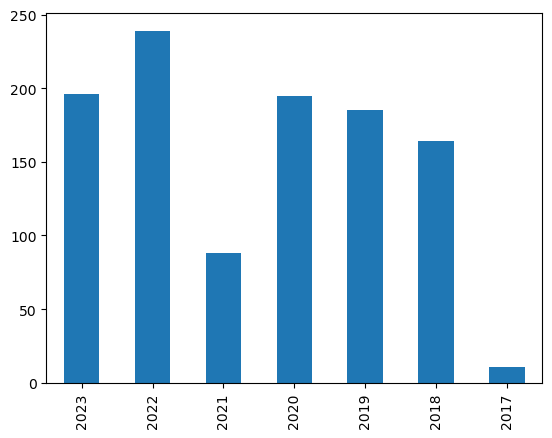

In [5]:
data_df.Last.dt.year.value_counts(sort=False).plot(kind='bar',)

<Axes: >

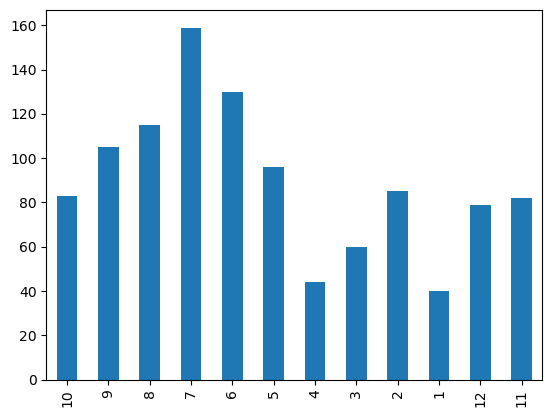

In [6]:
data_df.Last.dt.month.value_counts(sort=False).plot(kind='bar',)

<Axes: >

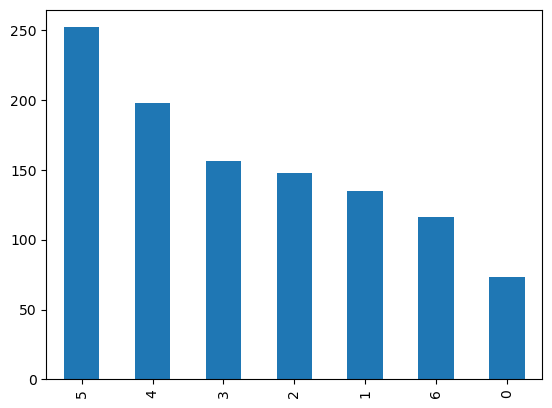

In [7]:
data_df.Last.dt.day_of_week.value_counts().plot(kind='bar',)

<Axes: >

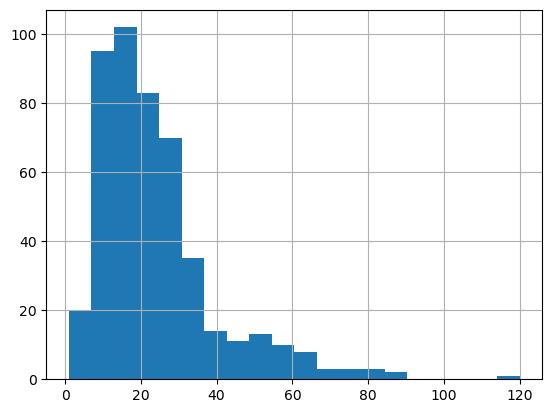

In [8]:
data_df.IBU.hist(bins=20)

<Axes: >

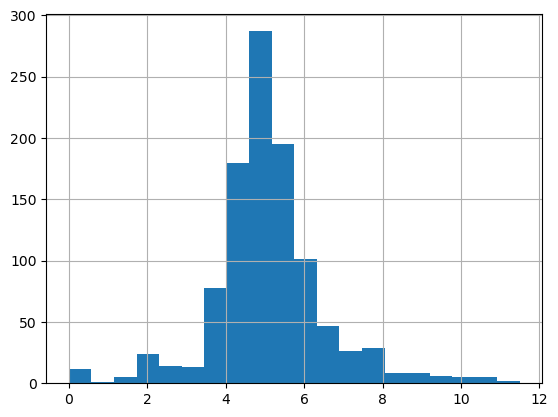

In [9]:
data_df.ABV.hist(bins=20)

<Axes: >

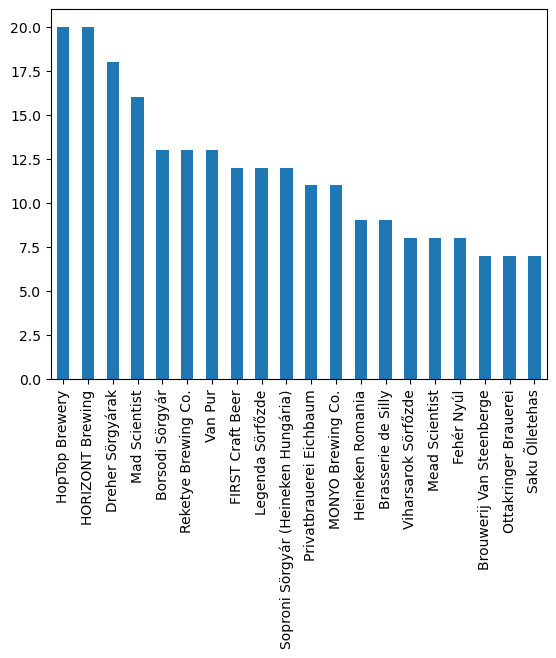

In [10]:
data_df.Brewery.value_counts()[:20].plot(kind='bar',)

<Axes: >

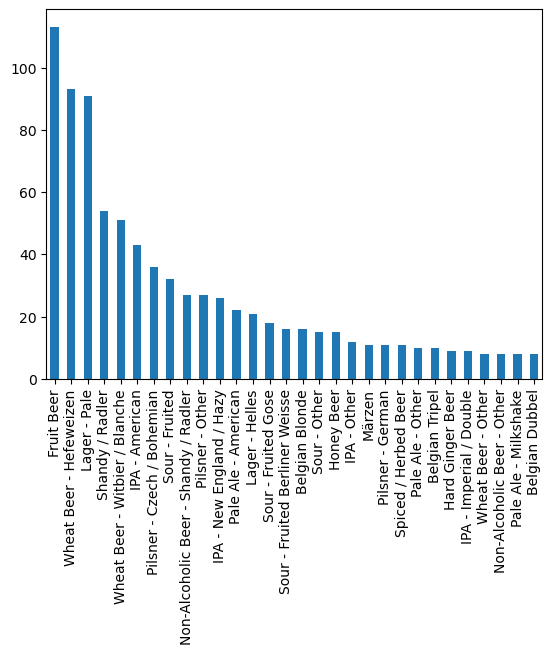

In [11]:
data_df.Style.value_counts()[:30].plot(kind='bar',)

<Axes: >

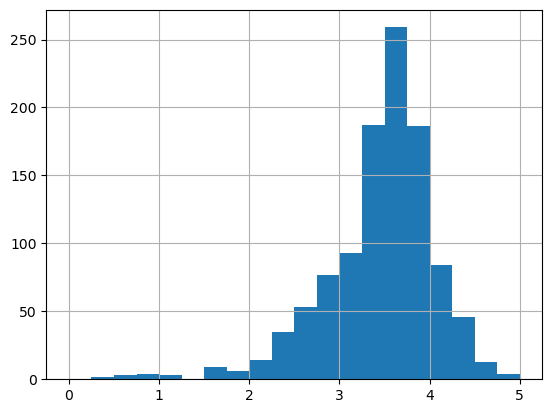

In [12]:
data_df.Own_Rating.hist(bins=20, range=(0,5))

<Axes: >

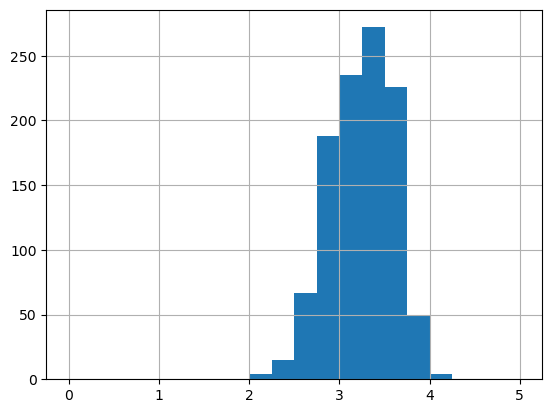

In [13]:
data_df.Global_Rating.hist(bins=20, range=(0,5))

<Axes: >

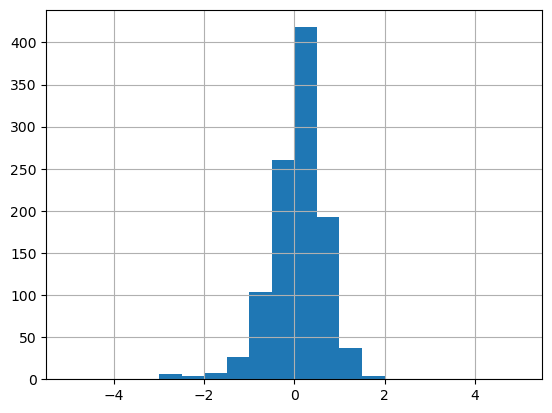

In [14]:
(data_df.Own_Rating-data_df.Global_Rating).hist(bins=20, range=(-5,5))

In [15]:
(data_df.Own_Rating-data_df.Global_Rating).mean()

0.07877358490566036

In [16]:
(data_df.Own_Rating-data_df.Global_Rating).median()

0.1499999999999999

<Axes: xlabel='Last'>

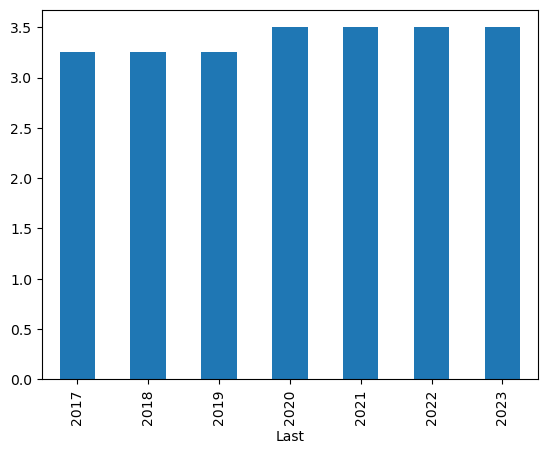

In [17]:
data_df.groupby(data_df.Last.dt.year).Own_Rating.median().plot(kind='bar',)

<Axes: xlabel='Last'>

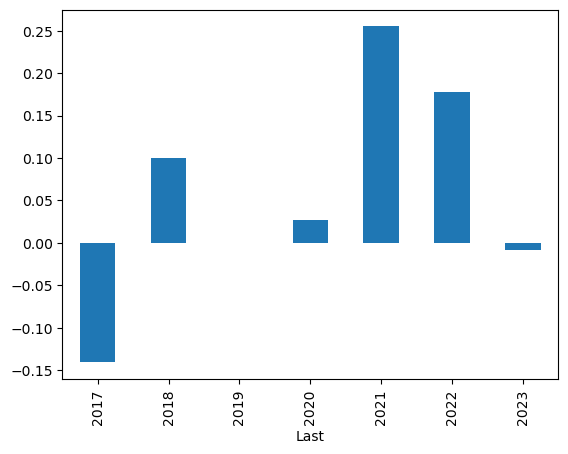

In [23]:
data_df.groupby(data_df.Last.dt.year)["RatingDiff"].mean().plot(kind='bar',)

<Axes: xlabel='Last'>

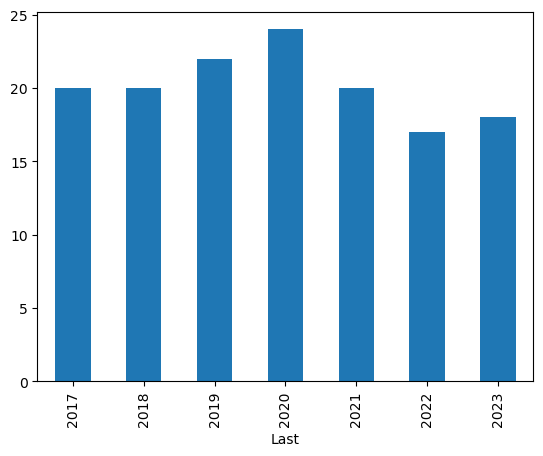

In [28]:
data_df.groupby(data_df.Last.dt.year)["IBU"].median().plot(kind='bar',)

<Axes: xlabel='Last'>

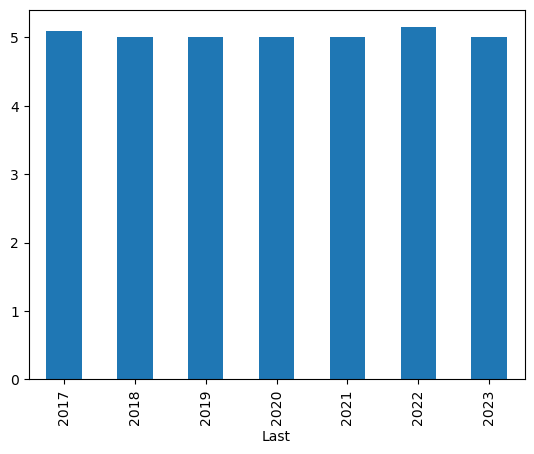

In [29]:
data_df.groupby(data_df.Last.dt.year)["ABV"].median().plot(kind='bar',)

In [34]:
data_df.groupby(data_df.Last.dt.year)["Style"].agg(lambda x: x.mode())

Last
2017                  Lager - Pale
2018                  Lager - Pale
2019                  Lager - Pale
2020                    Fruit Beer
2021    [Fruit Beer, Lager - Pale]
2022                    Fruit Beer
2023                Sour - Fruited
Name: Style, dtype: object

In [35]:
data_df.groupby(data_df.Last.dt.year)["Brewery"].agg(lambda x: x.mode())

Last
2017    [Belle-Vue, Birra Moretti, Birrificio Angelo P...
2018    [Dreher Sörgyárak, Karlovačka Pivovara (Heinek...
2019                                     Heineken Romania
2020                                     HORIZONT Brewing
2021                                     Carlsberg Srbija
2022                                       Saku Õlletehas
2023                                   Brasserie de Silly
Name: Brewery, dtype: object

In [36]:
data_df

,Name,Brewery,Style,Own_Rating,Global_Rating,ABV,IBU,First,Last,Total,RatingDiff
0,Fruit Works - Strawberry + Lime,Brew Your Mind,Sour - Fruited,3.75,3.99,5.5,NaN,2023-10-01,2023-10-01,1,-0.24
1,Fruit Flies (Into My Mouth),FIRST Craft Beer,Sour - Fruited,3.25,3.80,5.3,NaN,2023-09-29,2023-09-29,1,-0.55
2,Very Mango,Mad Scientist,Sour - Fruited Berliner Weisse,3.00,3.53,5.0,NaN,2023-09-29,2023-09-29,1,-0.53
3,Common Ground,HopTails Brewery,Sour - Fruited Gose,4.25,3.84,6.0,NaN,2023-09-29,2023-09-29,1,0.41
4,Side of World - New Zealand,Yeast Side,IPA - New England / Hazy,3.25,3.79,6.0,NaN,2023-09-29,2023-09-29,1,-0.54
...,...,...,...,...,...,...,...,...,...,...,...
1073,Chimay Dorée (Gold),Bières de Chimay,Belgian Enkel / Patersbier,3.25,3.55,4.8,16.0,2017-07-16,2017-07-16,1,-0.30
1074,Pilsener,Hertog Jan,Pilsner - Other,2.25,3.62,5.1,21.0,2017-07-15,2017-07-15,1,-1.37
1075,Blanche de Charleroi,Brasserie de l'Abbaye d'Aulne,Wheat Beer - Witbier / Blanche,4.50,3.39,5.0,NaN,2017-07-15,2017-07-15,1,1.11
1076,Kriek,Belle-Vue,Lambic - Kriek,3.00,3.20,5.1,10.0,2017-07-14,2017-07-14,1,-0.20
